# Dataset Description

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

## 1. Data Cleaning

### Read the dataset

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import  seaborn as sb
import matplotlib as plt
from sklearn.model_selection import train_test_split
task=pd.read_csv("Task (1) Dataset.csv")
task.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### Handle Missing Values

In [14]:
task.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [35]:
if 'Type_of_collision' in task:
        task['Type_of_collision']= task['Type_of_collision'].fillna(task['Type_of_collision'].mode()[0])


In [103]:
task['Type_of_collision']

0        Collision with roadside-parked vehicles
1                 Vehicle with vehicle collision
2                Collision with roadside objects
3                 Vehicle with vehicle collision
4                 Vehicle with vehicle collision
                          ...                   
12311             Vehicle with vehicle collision
12312             Vehicle with vehicle collision
12313             Vehicle with vehicle collision
12314             Vehicle with vehicle collision
12315             Vehicle with vehicle collision
Name: Type_of_collision, Length: 12316, dtype: object

### Correct any inconsistent data entries

- values out of the ordinary?
- mixed-case (captial and small)?
- units?
- ...etc.

In [99]:
task['Day_of_week'].reset_index()


,index,Day_of_week
0,0,Monday
1,1,Monday
2,2,Monday
3,3,Sunday
4,4,Sunday
...,...,...
12311,12311,Wednesday
12312,12312,Sunday
12313,12313,Sunday
12314,12314,Sunday


### Ensure data types are appropriate for each column.

- numerical but object?
- date but object?
- ...etc.

In [104]:
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [105]:
task.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
6736,20:40:00,Saturday,Unknown,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Governmental,5-10yrs,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury


In [100]:
type(task ['Accident_severity'])

pandas.core.series.Series

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset

In [46]:
#task.aggregate(['min','max'])

task.describe()


count     12316
unique        3
top        Male
freq       5253
Name: Sex_of_casualty, dtype: object

### Identify and analyze patterns in the data

- heatmap

<Axes: >

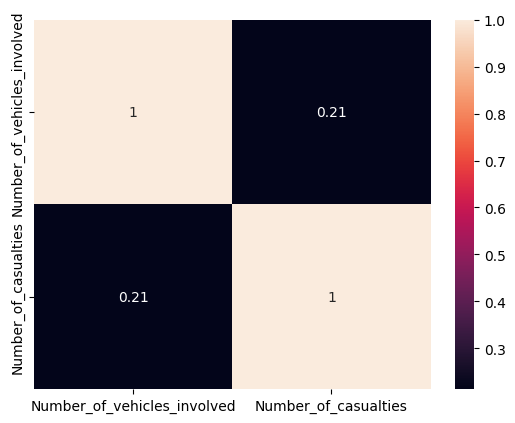

In [59]:
#sns.heatmap(task.corr(), annot= True)
task.select_dtypes(include=[np.number]).corr()
sb.heatmap(task.select_dtypes(include=[np.number]).corr(), annot=True)

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

<Axes: xlabel='Age_band_of_driver'>

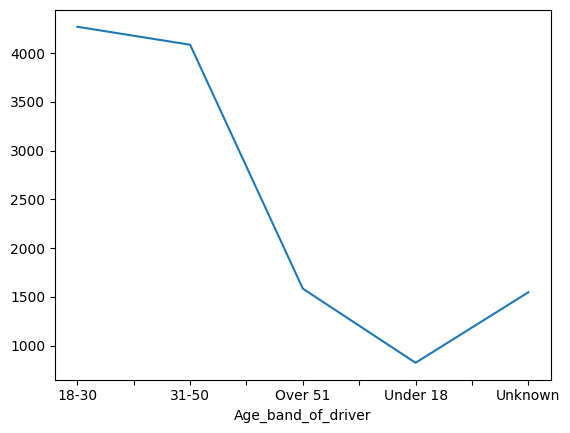

In [61]:

task['Age_band_of_driver'].value_counts().sort_index().plot.line()

<Axes: xlabel='Day_of_week'>

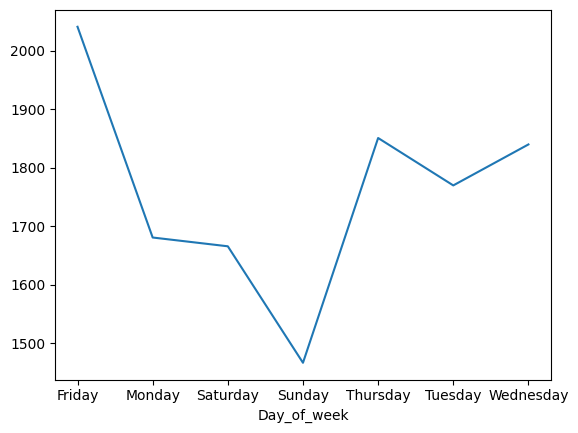

In [108]:

task['Day_of_week'].value_counts().sort_index().plot.line()

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


<Axes: xlabel='Age_band_of_driver', ylabel='Accident_severity'>

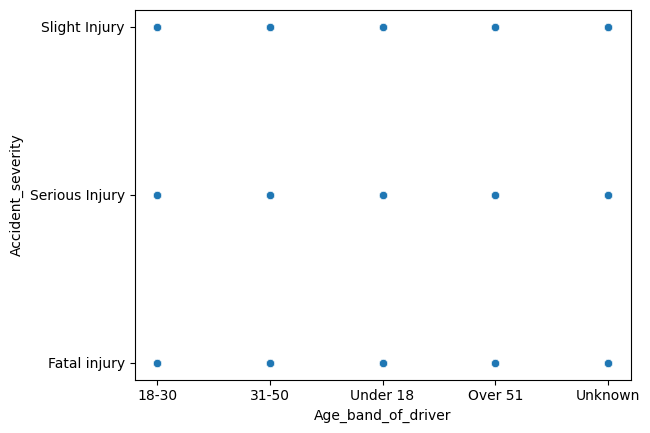

In [63]:
sns.scatterplot( x= 'Age_band_of_driver', y= 'Accident_severity', data= task)

<Axes: xlabel='Sex_of_driver', ylabel='Accident_severity'>

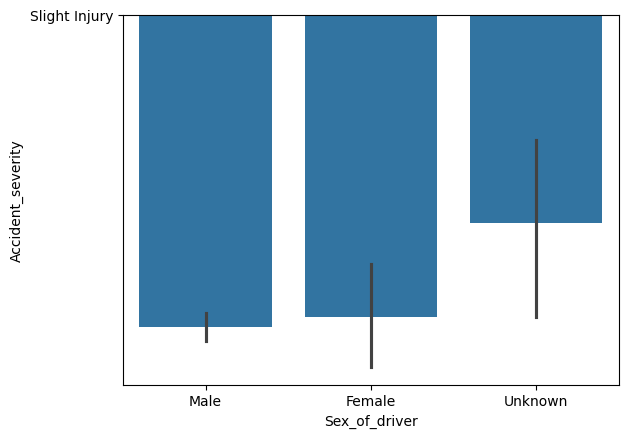

In [115]:
sns.barplot( x= 'Sex_of_driver', y= 'Accident_severity', data= task)

## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


<Axes: >

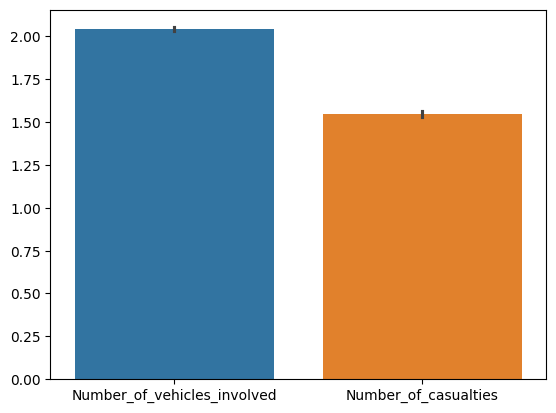

In [65]:
sns.barplot(data= task)

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

In [80]:
task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

Time
Day_of_week
Age_band_of_driver
Sex_of_driver
Educational_level
Vehicle_driver_relation
Driving_experience
Type_of_vehicle
Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity

In [93]:
task['Cause_of_accident'].unique()


array(['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Unknown',
       'Overturning', 'Turnover', 'Driving under the influence of drugs',
       'Drunk driving'], dtype=object)

In [109]:

task['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

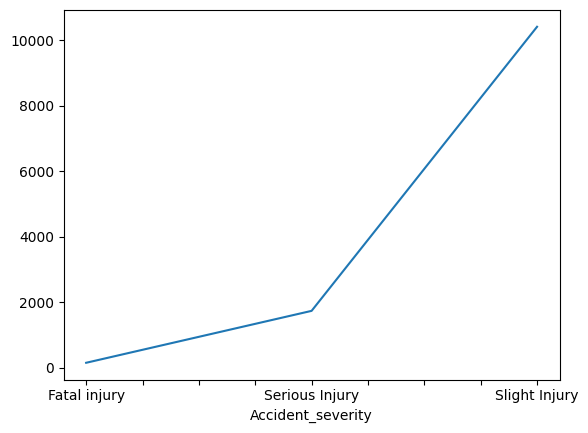

In [110]:
task['Accident_severity'].value_counts().sort_index().plot.line().rotation=90

<Axes: xlabel='Number_of_casualties', ylabel='Vehicle_movement'>

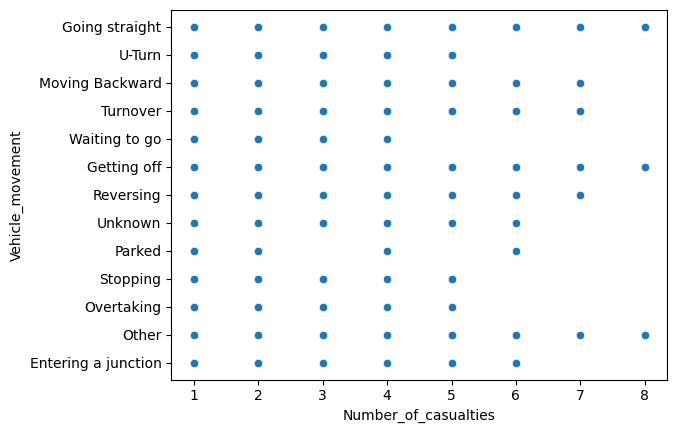

In [91]:
sns.scatterplot( x= 'Number_of_casualties', y= 'Vehicle_movement', data= task)


<Axes: ylabel='Count'>

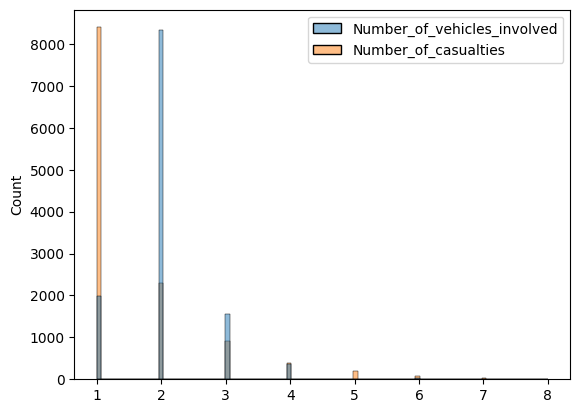

In [66]:
sns.histplot(data= task)

<Axes: xlabel='Vehicle_movement', ylabel='Educational_level'>

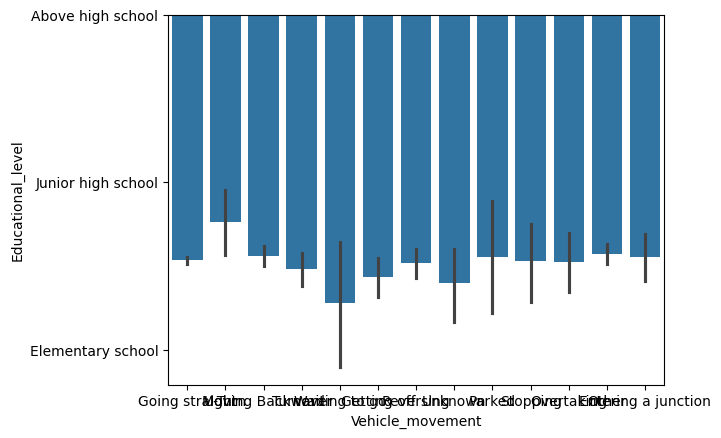

In [70]:
sns.barplot(x='Vehicle_movement' ,y='Educational_level' , data= task)

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

Age band of driver mostly in range 18-30 and rarely be under 18
The possiability of the type of car is auto is higher 
No direct relation between the band of age and Accident_severity
Accident severity has big possability to be slight injury
Commonly Male drivers cause a fetal injury

In [121]:
task['Casualty_class'].unique()

array(['na', 'Driver or rider', 'Pedestrian', 'Passenger'], dtype=object)

In [122]:
task['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

<Axes: xlabel='Casualty_class', ylabel='Types_of_Junction'>

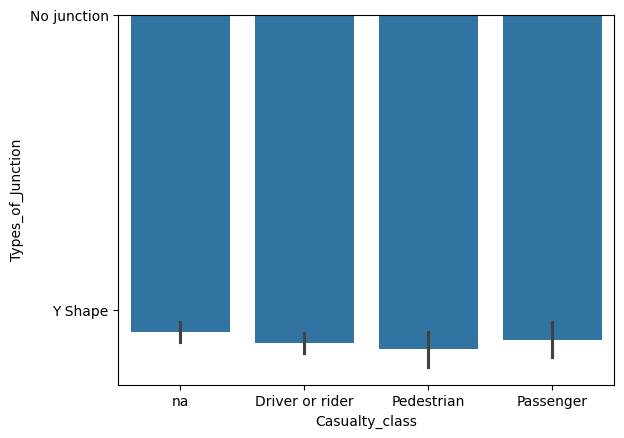

In [120]:
sns.barplot( x= 'Casualty_class', y= 'Types_of_Junction', data= task)